# Synthèse de filtres numériques RII

## 1/ Synthèse d'un filtre du premier ordre, par invariance temporelle

Soit le filtre analogique suivant, de fonction de tranfert $H_a(p)$ :
$$H_a(p) = \frac{1}{1+\tau p},$$
avec $\tau$ la constant de temps du filtre. Cette constante de temps définit la fréquence de coupure $f_c$ à -3dB du filtre, selon
$$ f_c = \frac{1}{2\pi \tau}.$$

Pour cet exemple, supposons qu'on ait $f_c = 1$kHz.

### 1.1) Caractérisation du filtre analogique

In [1]:
# Chargement des librairies nécessaires
#%matplotlib notebook
# For PDF export only :
%matplotlib inline 
import numpy as np
import pylab as plt
from scipy import signal 
#%load_ext autoreload
#%autoreload 2

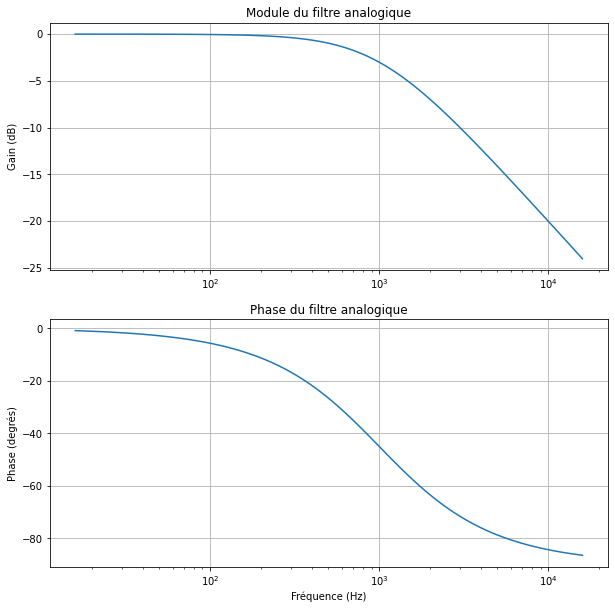

In [2]:
# Définition des paramètres du filtre
fc = 1000
tau = 1/(2*np.pi*fc)

# Définition de la fonction de transfert Ha
num_a = [1]
den_a = [tau, 1]
H_a = signal.TransferFunction(num_a, den_a)

# Tracé de la réponse en fréquence
w_a, mag_a, phase_a = signal.bode(H_a)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_a/(2*np.pi), mag_a)
plt.ylabel('Gain (dB)')
plt.title('Module du filtre analogique')
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(w_a/(2*np.pi), phase_a)
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase du filtre analogique')
plt.grid()

Le tracé du filtre montre bien un filtre du premier ordre (pente de -20dB/décade) et une fréquence de coupure à -3dB de 1 kHz, comme attendu

### 1.2) Synthèse par équivalence à la réponse impulsionnelle

D'après le calcul effectué en cours, le filtre numérique possédant la même réponse impulsionnelle que le filtre analogique ci-dessus possède une fonction de transfert $H_{d1}(z)$ donnée par
$$ H_{d1} = \frac{1}{\tau}\ \frac{1}{1-e^{-\frac{T_e}{\tau}}z^{-1}}.$$
On propose ici de travailler avec une fréquence d'échantillonnage $F_{e1} = 10$kHz ou $F_{e2} = 4$kHz.

In [3]:
# Définition des 2 filtres numériques, pour les 2 fréquences d'échantillonnage proposées
Fe1 = 10000.0
Te1 = 1/Fe1
Fe2 = 4000.0
Te2 = 1/Fe2
num_d1 = [1/tau, 0]
den_d11 = [1, -np.exp(-Te1/tau)]
den_d12 = [1, -np.exp(-Te2/tau)]
H_d11 = signal.TransferFunction(num_d1, den_d11, dt=Te1)
H_d12 = signal.TransferFunction(num_d1, den_d12, dt=Te2)

Le gain statique du filtre analogique est de (dB)  -0.0010999414705612498
Le gain statique du filtre numérique (fe = 10kHz) est de (dB)  82.5863426731473
Le gain statique du filtre numérique (fe = 4kHz) est de (dB)  77.98777314570829


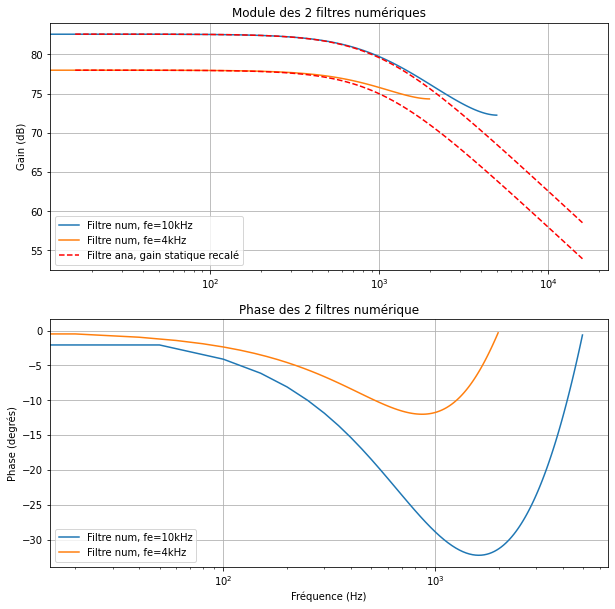

In [4]:
# Tracé de la réponse en fréquence
w_d11, mag_d11, phase_d11 = signal.dbode(H_d11)
w_d12, mag_d12, phase_d12 = signal.dbode(H_d12)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_d11/(2*np.pi), mag_d11, label='Filtre num, fe=10kHz')
plt.semilogx(w_d12/(2*np.pi), mag_d12, label='Filtre num, fe=4kHz')
plt.semilogx(w_a/(2*np.pi), mag_a+mag_d11[0], 'r--', label='Filtre ana, gain statique recalé')
plt.semilogx(w_a/(2*np.pi), mag_a+mag_d12[0], 'r--')
plt.ylabel('Gain (dB)')
plt.title('Module des 2 filtres numériques')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.semilogx(w_d11/(2*np.pi), phase_d11, label='Filtre num, fe=10kHz')
plt.semilogx(w_d12/(2*np.pi), phase_d12, label='Filtre num, fe=4kHz')
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase des 2 filtres numérique')
plt.grid()
plt.legend()

print("Le gain statique du filtre analogique est de (dB) ", mag_a[0])
print("Le gain statique du filtre numérique (fe = 10kHz) est de (dB) ", mag_d11[0])
print("Le gain statique du filtre numérique (fe = 4kHz) est de (dB) ", mag_d12[0])


On constate donc que la "ressemblance" des réponses en fréquence entre le filtre analogique et numérique est "lointaine" ... car en particulier le gain statique du filtre numérique n'est pas le même que celui du filtre analogique. Si on compare les allures indépendemment du gain statique, la ressemblance est d'autant meilleure que la fréquence d'échantillonnage est élevée.

<ipython-input-6-8149d0c6f14b>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d11,np.squeeze(h_d11),linefmt='r', markerfmt='or', label='Filtre numérique, fe=10kHz')
<ipython-input-6-8149d0c6f14b>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d12,np.squeeze(h_d12),linefmt='g', markerfmt='og', label='Filtre numérique, fe=4kHz')


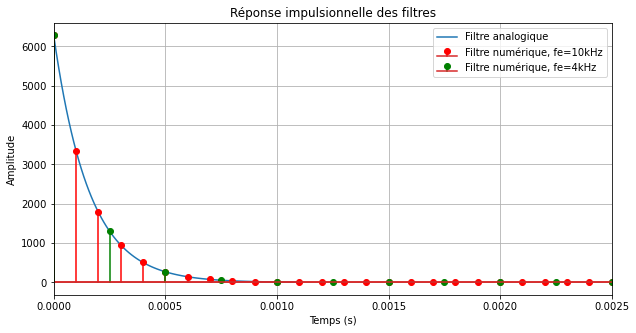

In [6]:
# Et dans le domaine temporel ?
t_a, h_a = signal.impulse(H_a)
t_d11, h_d11 = signal.dimpulse(H_d11)
t_d12, h_d12 = signal.dimpulse(H_d12)

plt.figure(figsize=(10,5))
plt.plot(t_a,h_a, label='Filtre analogique')
plt.stem(t_d11,np.squeeze(h_d11),linefmt='r', markerfmt='or', label='Filtre numérique, fe=10kHz')
plt.stem(t_d12,np.squeeze(h_d12),linefmt='g', markerfmt='og', label='Filtre numérique, fe=4kHz')
plt.xlim((0,25*Te1));
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réponse impulsionnelle des filtres')
plt.legend()
plt.grid()



On constate donc que, comme attendu, les échantillons de la réponse impulsionnelle du filtre numérique coincident exactement avec la réponse impulsionnelle du système analogique d'origine.

#### Et qu'en est-il de la réponse indicielle ?

<ipython-input-9-0c75d7439207>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d11,np.squeeze(yind_d11),linefmt='r', markerfmt='or', label='Filtre numérique, fe=10kHz')
<ipython-input-9-0c75d7439207>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d12,np.squeeze(yind_d12),linefmt='g', markerfmt='og', label='Filtre numérique, fe=4kHz')


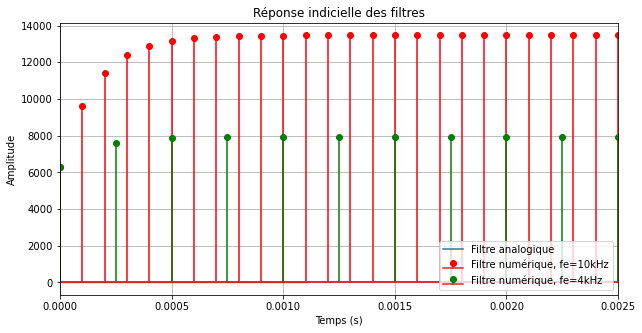

In [9]:
t_a, yind_a = signal.step(H_a)
t_d11, yind_d11 = signal.dstep(H_d11)
t_d12, yind_d12 = signal.dstep(H_d12)

plt.figure(figsize=(10,5))
plt.plot(t_a,yind_a,label='Filtre analogique')
plt.stem(t_d11,np.squeeze(yind_d11),linefmt='r', markerfmt='or', label='Filtre numérique, fe=10kHz')
plt.stem(t_d12,np.squeeze(yind_d12),linefmt='g', markerfmt='og', label='Filtre numérique, fe=4kHz')
plt.xlim((0,25*Te1));
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réponse indicielle des filtres')
plt.legend(loc=4)
plt.grid()


Une synthèse par équivalence à la réponse impulsionnelle garantie donc la bonne reproduction ... de la réponse impulsionnelle seulement, et pas des autres réponses temporelles. 

On remarque bien sûr que la réponse indicielle des 2 filres numériques tendent vers des valeurs beaucoup plus importantes, qui sont en pratique égales à la valeur de leur gain statique.

### 1.3) Synthèse par équivalence à la réponse indicielle

D'après le principe du calcul vu en cours, on peut montrer que le filtre numérique possédant la même réponse indicielle que le filtre analogique d'origine possède une fonction de transfert $H_{d2}(z)$ donnée par
$$ H_{d2} = \frac{1-e^{-\frac{T_e}{\tau}}}{z-e^{-\frac{T_e}{\tau}}}.$$
On propose ici de travailler avec une fréquence d'échantillonnage $F_{e} = 10$kHz.

<ipython-input-10-d84f0e79c499>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d2,np.squeeze(yind_d2),linefmt='r', markerfmt='or', label='Filtre numérique')


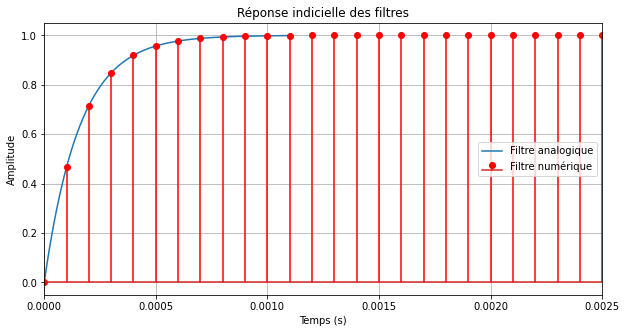

In [10]:
Fe = 10000
Te = 1/Fe
num_d2 = [1-np.exp(-Te/tau)]
den_d2 = [1, -np.exp(-Te/tau)]
H_d2 = signal.TransferFunction(num_d2, den_d2, dt=Te)

# Calcul de la réponse indicielle obtenue
t_a, yind_a = signal.step(H_a)
t_d2, yind_d2 = signal.dstep(H_d2)

# Tracé
plt.figure(figsize=(10,5))
plt.plot(t_a,yind_a,label='Filtre analogique')
plt.stem(t_d2,np.squeeze(yind_d2),linefmt='r', markerfmt='or', label='Filtre numérique')
plt.xlim((0,25*Te));
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réponse indicielle des filtres')
plt.legend()
plt.grid()

Comme attendu, la synthèse par équivalence à la réponse indicielle conserve ... la réponse indicielle ! Par contre, pour la réponse impulsionnelle :

<ipython-input-20-77c8d4bede96>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_d2,np.squeeze(h_d2),linefmt='r', markerfmt='or',label='filtre numérique')


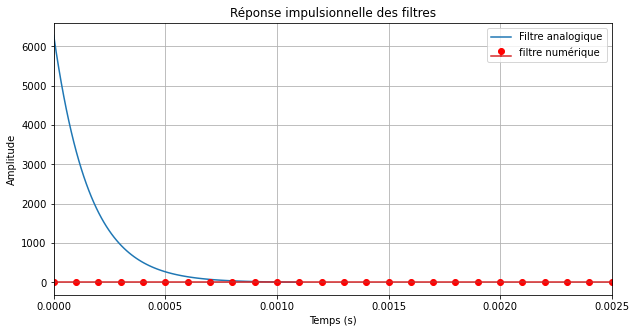

In [20]:
# Calcul de la réponse impulsionnelle obtenue
t_a, h_a = signal.impulse(H_a)
t_d2, h_d2 = signal.dimpulse(H_d2)

# Tracé
plt.figure(figsize=(10,5))
plt.plot(t_a,h_a,label='Filtre analogique')
plt.stem(t_d2,np.squeeze(h_d2),linefmt='r', markerfmt='or',label='filtre numérique')
plt.xlim((0,25*Te));
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réponse impulsionnelle des filtres')
plt.legend()
plt.grid()

La conclusion est donc la même que précédemment : on ne peut reproduire le comportement temporel que pour une entrée (ici un échelon), et alors le comportement temporel pour les autres entrées n'est pas garanti ... Ici l'amplitude de la réponse impulsionnelle du filtre numérique est très faible comparativement à celle du filtre analogique.

Et dans le domaine spectral ?

Le gain statique du filtre analogique est de (dB)  -0.0010999414705612498
Le gain statique du filtre numérique (fe = 10kHz) est de (dB)  0.0


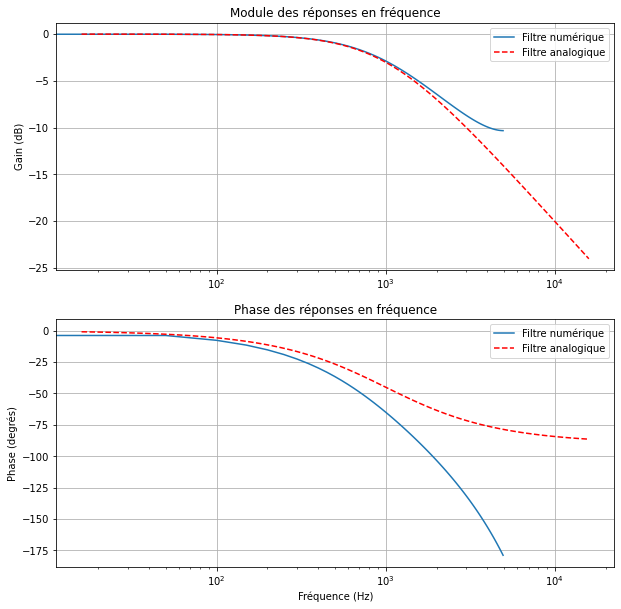

In [21]:
# Tracé de la réponse en fréquence
w_d2, mag_d2, phase_d2 = signal.dbode(H_d2)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_d2/(2*np.pi), mag_d2, label='Filtre numérique')
plt.semilogx(w_a/(2*np.pi), mag_a, 'r--', label='Filtre analogique')
plt.ylabel('Gain (dB)')
plt.title('Module des réponses en fréquence')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(w_d2/(2*np.pi), phase_d2, label='Filtre numérique')
plt.semilogx(w_a/(2*np.pi), phase_a, 'r--', label='Filtre analogique')
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase des réponses en fréquence')
plt.legend()
plt.grid()

print("Le gain statique du filtre analogique est de (dB) ", mag_a[0])
print("Le gain statique du filtre numérique (fe = 10kHz) est de (dB) ", mag_d2[0])

On constate donc que cette fois l'équivalence indicielle a conservé le gain statique ! Par ailleurs, la ressemblance à la réponse en fréquence du filtre analogique est "bonne", et d'autant meilleure que la fréquence est faible.

## 2/ Synthèse par équivalence de p en z

### 2.1) Equivalence à la dérivation

En pratique ... elle reste (très) peu utilisée, comparativement à la suivante.

### 2.2) Transformation bilinéaire, ou équivalence à l'intégration

On souhaite réaliser un filtre numérique de fréquence d'échantillonnage $F_e = 10$kHz :
- de fréquence de coupure : $F_c$ = 3kHz
- de bande de transition $\Delta_f$ = 1kHz
- avec pas plus de $R_p$ = 2dB d'oscillations dans la bande passante
- et au moins $R_s- = 40dB d'atténuation dans la bande coupée

In [24]:
# Gabarit du filtre souhaité
Fc1 = 3000
Delta_f = 1000
Fc2 = Fc1 + Delta_f
Rp = 2
Rs = 40

Fe = 10000
Te = 1/Fe

Pour commencer, on fait tout comme si aucun gauchissement ne se passait. On va donc synthétiser, grâce aux fonctions "toutes faites", un filtre analogique qui respecte le gabarit ci-dessus. Puis, on appliquera la transformation bilinéaire à ce filtre pour otenir un équivalent numérique sans plus de calcul.

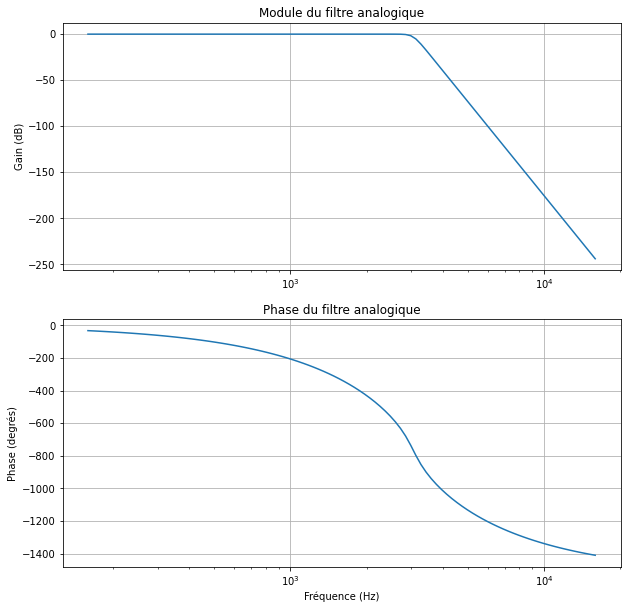

In [25]:
# Dtermination de l'ordre minimal du filtre
N, Wn = signal.buttord(2*np.pi*Fc1, 2*np.pi*Fc2, Rp, Rs, True)

# Détermination de sa fonction de transfert
num_a1, den_a1 = signal.butter(N, Wn, analog=True)
H_a1 = signal.TransferFunction(num_a1, den_a1)

# Tracé de la réponse en fréquence
w_a1, mag_a1, phase_a1 = signal.bode(H_a1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_a1/(2*np.pi), mag_a1)
plt.ylabel('Gain (dB)')
plt.title('Module du filtre analogique')
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(w_a1/(2*np.pi), phase_a1)
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase du filtre analogique')
plt.grid()

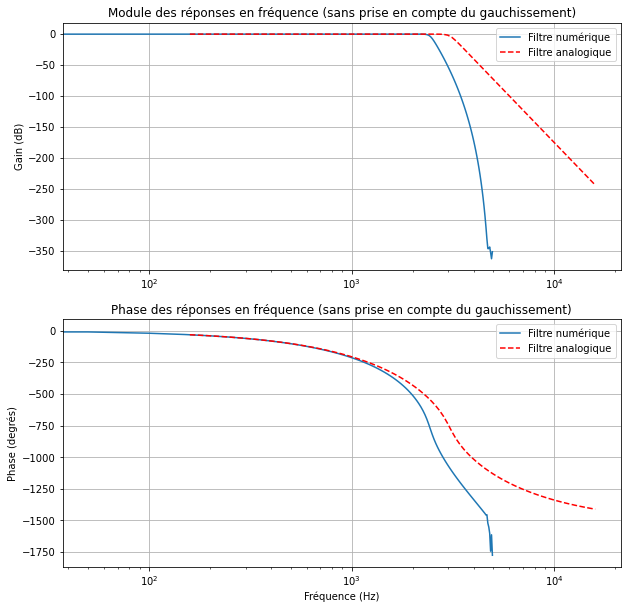

In [26]:
# Détermination du filtre numérique équivalent par transformation bilinéaire
num_d1, den_d1 = signal.bilinear(num_a1, den_a1, Fe)

# Définition de la fonction de transfert, et tracé de la réponse en fréquence
H_d1 = signal.TransferFunction(num_d1, den_d1, dt=Te)
w_d1, mag_d1, phase_d1 = signal.dbode(H_d1)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_d1/(2*np.pi), mag_d1, label='Filtre numérique')
plt.semilogx(w_a1/(2*np.pi), mag_a1, 'r--', label='Filtre analogique')
plt.ylabel('Gain (dB)')
plt.title('Module des réponses en fréquence (sans prise en compte du gauchissement)')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(w_d1/(2*np.pi), phase_d1, label='Filtre numérique')
plt.semilogx(w_a1/(2*np.pi), phase_a1, 'r--', label='Filtre analogique')
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase des réponses en fréquence (sans prise en compte du gauchissement)')
plt.legend()
plt.grid()


On constate donc que le transformation analogique vers numérique appliquée ici (la transformation bilinéaire) modifie le comportement en fréquence du filtre numérique comparativement à celui du filtre analogique. Si le filtre analogique respecte le gabarit demandé, ce n'est plus le cas du filtre numérique ...
Ce phénomène est lié au gauchissement créé par la transformation bilinaire, qui déforme l'axe des fréquences. Il est donc nécessaire de modifier le filtre analogique auquel on applique la transformation bilinéaire de façon à ce que le filtre numérique résultant respecte lui le cahier des charges. En d'autres termes :
- sans prise en compte du gauchissement : on part d'un filtre analogique qui respecte le gabarit, mais on obtient un filtre numérique qui ne le respecte pas
- avec prise en compte du gauchissement : on part d'un filtre analogique qui ne respecte pas, volontairement, le gabariat, mais le filtre numérique qu'on obtiendra ensuite le respectera !

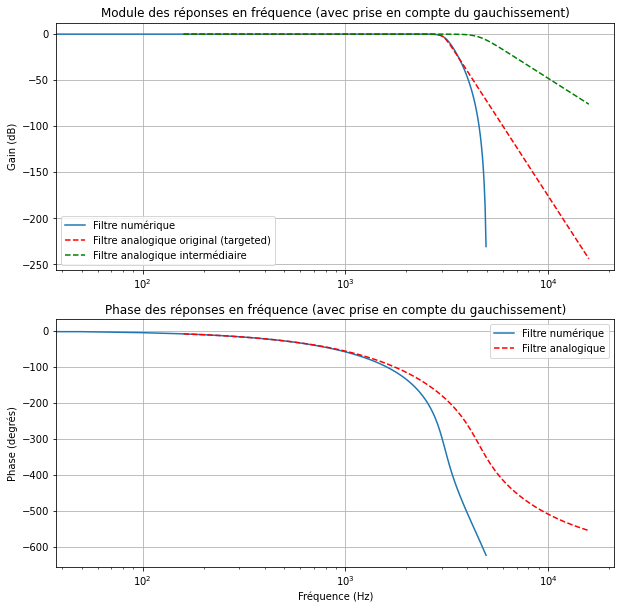

In [30]:
# On déforme donc le gabarit en amont de la synthèse analogique
Fc1_corrige = Fe/np.pi*np.tan(np.pi*Fc1/Fe)
Fc2_corrige = Fe/np.pi*np.tan(np.pi*Fc2/Fe)

# On détermine alors le nouveau filtre analogique, préalablement déformé
N, Wn = signal.buttord(2*np.pi*Fc1_corrige, 2*np.pi*Fc2_corrige, Rp, Rs, True)
num_a2, den_a2 = signal.butter(N, Wn, analog=True)
H_a2 = signal.TransferFunction(num_a2, den_a2)
w_a2, mag_a2, phase_a2 = signal.bode(H_a2)

# Et on applique dessus la transformation bilinéaire
num_d2, den_d2 = signal.bilinear(num_a2, den_a2, Fe)

# Définition de la fonction de transfert, et tracé de la réponse en fréquence
H_d2 = signal.TransferFunction(num_d2, den_d2, dt=Te)
w_d2, mag_d2, phase_d2 = signal.dbode(H_d2)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(w_d2/(2*np.pi), mag_d2, label='Filtre numérique')
plt.semilogx(w_a1/(2*np.pi), mag_a1, 'r--', label='Filtre analogique original (targeted)')
plt.semilogx(w_a2/(2*np.pi), mag_a2, 'g--', label='Filtre analogique intermédiaire')
plt.ylabel('Gain (dB)')
plt.title('Module des réponses en fréquence (avec prise en compte du gauchissement)')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(w_d2/(2*np.pi), phase_d2, label='Filtre numérique')
plt.semilogx(w_a2/(2*np.pi), phase_a2, 'r--', label='Filtre analogique')
plt.ylabel('Phase (degrés)')
plt.xlabel('Fréquence (Hz)')
plt.title('Phase des réponses en fréquence (avec prise en compte du gauchissement)')
plt.legend()
plt.grid()


On constate donc que cette fois, le filtre numérique synthétisé respecte exactement le gabarit souhaité : il coupe à partir de 3kHz, et atteint exactement 50dB d'atténuation à 4kHz. La prise en compte préalable de la déformation de l'axe des fréquences permet ainsi d'atteindre le gabarit souhaité.